# Image text classification multilabel

### Necessary libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import keras
from keras.layers import Conv2D, MaxPooling2D,Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.models import Sequential
from scipy import misc
from skimage import color
from skimage import io
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, 
                             precision_recall_fscore_support, 
                             accuracy_score,
                             confusion_matrix,
                             precision_score)

C:\Users\Ilyas\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Loading data

Examples of images from dataset:


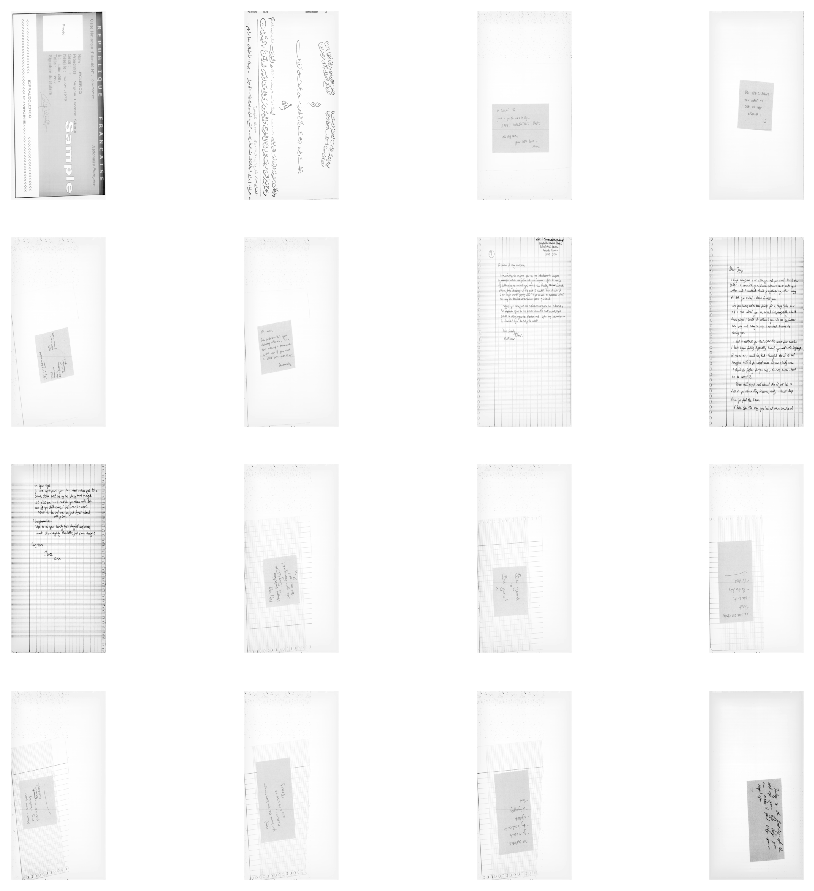

In [36]:
data = np.load('C:/Users/Ilyas/Desktop/M2_SID_SD/TER/data.npz')

Xtrain = data['Xtrain']
Xdev = data['Xdev']

print('Examples of images from dataset:')
# Plot the results
plt.figure(figsize=(16,16))
for i, image in enumerate(Xtrain[:16]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(image, cmap=plt.cm.gray,
               interpolation='nearest')
    plt.axis('off')
    plt.xticks(())
    plt.yticks(())
plt.show()

### Extract labels

In [35]:
ytrain_class = data['ytrain_class']
ydev_class = data['ydev_class']
ytrain_language = data['ytrain_language']
ydev_language = data['ydev_language']
ytrain_type = data['ytrain_type']
ydev_type = data['ydev_type']

ytrain = np.zeros((len(ytrain_class),3))
ydev = np.zeros((len(ydev_class),3))

for i in range(ytrain.shape[0]):
    ytrain[i,0] = ytrain_class[i]
    ytrain[i,1] = 5 + ytrain_language[i]
    ytrain[i,2] = 8 + ytrain_type[i]
    
for i in range(ydev.shape[0]):
    ydev[i,0] = ydev_class[i]
    ydev[i,1] = 5 + ydev_language[i]
    ydev[i,2] = 8 + ydev_type[i]

### CNN Model

In [37]:
def cnn_model(num_classes,input_shape):
    
    model = Sequential()
    
    model.add(Conv2D(8, kernel_size=(3, 3), activation='relu',padding='same', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(4, 4)))
    model.add(Dropout(0.3))

    model.add(Conv2D(16, (3, 3),padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(32, (3, 3),padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    
    model.add(Flatten())
    
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adam', metrics=['accuracy'])
    return model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 500, 250, 8)       80        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 125, 62, 8)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 125, 62, 8)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 125, 62, 16)       1168      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 62, 31, 16)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 62, 31, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 62, 31, 32)        4640      
__________

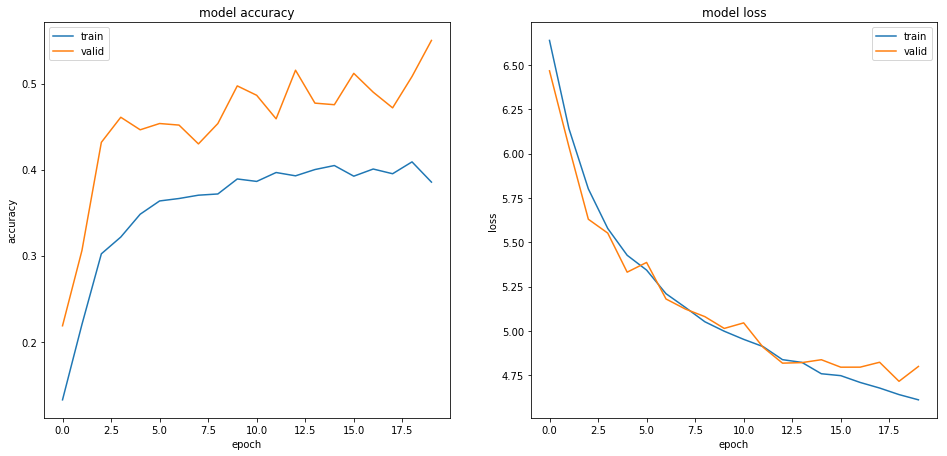

In [38]:
# Sets parameters
VALIDATION_SPLIT = .1
num_classes = 11
batch_size = 16
epochs = 30

# Reshape X_test and X_train
Xtrain = Xtrain.reshape(Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[2], 1)
Xdev = Xdev.reshape(Xdev.shape[0], Xtrain.shape[1], Xtrain.shape[2], 1)

# Convert class vectors to binary class matrices
y = np.zeros((ytrain.shape[0],num_classes))
for i in range(ytrain.shape[0]):
    y[i,int(ytrain[i,0])] = 1
    y[i,int(ytrain[i,1])] = 1
    y[i,int(ytrain[i,2])] = 1

ytrain = np.copy(y)
# Training model
input_shape = (Xtrain.shape[1], Xtrain.shape[2], 1)
model = cnn_model(num_classes,input_shape)
model.summary()
history = model.fit(Xtrain, ytrain, batch_size=batch_size, epochs=epochs, verbose=0, validation_split=VALIDATION_SPLIT)

# Plot results
plt.figure(figsize=(16,16))

# summarize history for accuracy
plt.subplot(2, 2, 1)
plt.title('train')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')

# summarize history for loss
plt.subplot(2, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()


------------------------------------------------------
******* performance of  class  prediction *********
------------------------------------------------------
labels : ['C1', 'C2', 'C3', 'C4', 'C5']
-----------------------------------------------------
Test accuracy:     0.87   
Test error:     0.13   
------------------------------------------------------
             precision    recall  f1-score   support

        0.0       0.97      0.91      0.94       193
        1.0       0.90      0.90      0.90       485
        2.0       0.72      0.92      0.81       216
        3.0       0.93      0.88      0.90       169
        4.0       1.00      0.09      0.16        47

avg / total       0.88      0.87      0.86      1110

------------------------------------------------------
Confusion matrix: 



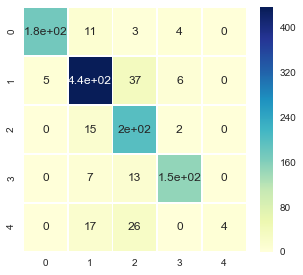

------------------------------------------------------
******* performance of  language  prediction *********
------------------------------------------------------
labels : ['fr', 'ar', 'en']
-----------------------------------------------------
Test accuracy:     0.84   
Test error:     0.16   
------------------------------------------------------
             precision    recall  f1-score   support

        5.0       0.81      0.94      0.87       570
        6.0       0.92      0.90      0.91       263
        7.0       0.85      0.57      0.68       277

avg / total       0.84      0.84      0.83      1110

------------------------------------------------------
Confusion matrix: 



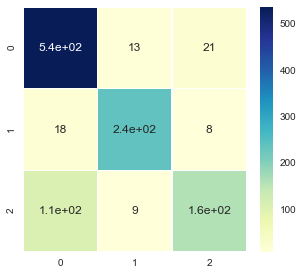

------------------------------------------------------
******* performance of  type  prediction *********
------------------------------------------------------
labels : ['print', 'hand', 'mixte']
-----------------------------------------------------
Test accuracy:     0.77   
Test error:     0.23   
------------------------------------------------------
             precision    recall  f1-score   support

        8.0       0.78      0.63      0.70       372
        9.0       0.75      0.82      0.78       137
       10.0       0.77      0.84      0.81       601

avg / total       0.77      0.77      0.77      1110

------------------------------------------------------
Confusion matrix: 



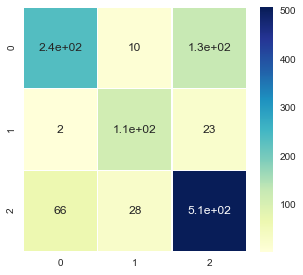

------------------------------------------------------
mean precision :     0.83   
mean recall :        0.83   
mean fscore :        0.83   


In [62]:
pred = model.predict(Xdev)

ypred = np.zeros((ydev.shape[0],3))

for i in range(pred.shape[0]):
    ypred[i,0] = np.where(pred[i] == max(pred[i,0:5]))[0]
    ypred[i,1] = np.where(pred[i] == max(pred[i,5:8]))[0]
    ypred[i,2] = np.where(pred[i] == max(pred[i,8:11]))[0]

precision = []
recall = []
fscore = []
classif = ['class','language','type']
classes = [['C1','C2','C3','C4','C5'],['fr','ar','en'],['print', 'hand', 'mixte']]
for i in range(3):
    print('------------------------------------------------------')
    print('******* performance of ',classif[i],' prediction *********')
    print('------------------------------------------------------')
    print('labels :',classes[i])
    
    print('-----------------------------------------------------')
    print("Test accuracy: ",'{:^10.2f}'.format(accuracy_score(ydev[:,i], ypred[:,i])))
    print("Test error: ",'{:^10.2f}'.format(1-accuracy_score(ydev[:,i], ypred[:,i])))
    print('------------------------------------------------------')
    
    p, r, f, s = precision_recall_fscore_support(ydev[:,i], ypred[:,i], 
                                                  average='micro',
                                                  labels=[x for x in 
                                                          np.unique(ydev[:,i]) 
                                                          if x not in ['CSDECMOTV']])

    precision.append(p)
    recall.append(r)
    fscore.append(f)
    
    print(classification_report(ydev[:,i], ypred[:,i], labels=[x for x in 
                                                           np.unique(ydev[:,i]) 
                                                           if x not in ['CSDECMOTV']]))
    print('------------------------------------------------------')
    print('Confusion matrix: \n')
    sns.set(rc={'figure.figsize':(5,4.5)})
    cm_data = confusion_matrix(ydev[:,i], ypred[:,i])
    cm = sns.heatmap(cm_data, annot=True, cmap="YlGnBu", linewidths=.5)
    plt.show()

print('------------------------------------------------------')
print('mean precision : ','{:^10.2f}'.format(np.mean(precision)))
print('mean recall :    ','{:^10.2f}'.format(np.mean(recall)))
print('mean fscore :    ','{:^10.2f}'.format(np.mean(fscore)))
